Example of a script that creates a histogram of the sum of two uniform random values

Several methods for creating the histogram will be shown

In [1]:
#Setup
import numpy as np
import matplotlib.pyplot as plt

#generate two arrays of random numbers uniformly distribution from 0 to 1, then add them
rnum = 1000
x = np.random.uniform(0,1,rnum) + np.random.uniform(0,1,rnum)

#number of bins for histogram
nbins = 50

Method 1: create a histogram plot from matplotlib

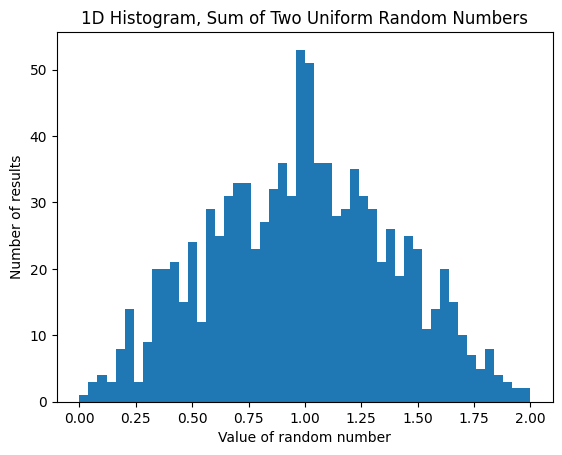

In [2]:
plt.hist(x,bins=nbins,range=(0,2))
plt.title('1D Histogram, Sum of Two Uniform Random Numbers')
plt.xlabel('Value of random number')
plt.ylabel('Number of results')
plt.savefig('day1_hist_1.png', bbox_inches='tight')
plt.show()

Method 2: use numpy to calculate the histogram values

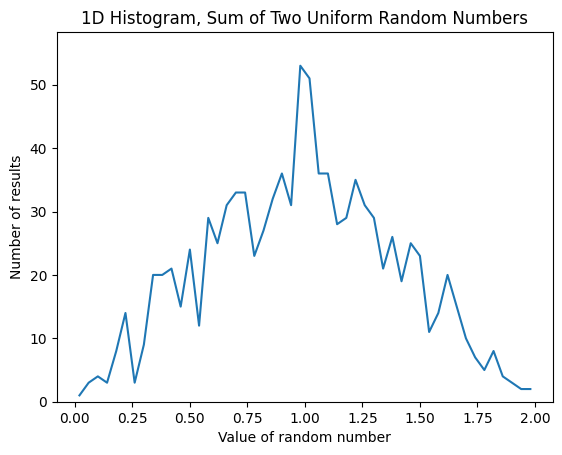

In [4]:
hy, hx = np.histogram(x,bins=nbins,range=(0,2))
#hy contains the number of results in each bin.
#hx contains the edges of the bins, but this changes it to the center of the bins.
hx = hx[0:nbins] + 0.5*2/nbins

#then use matplotlib to plot the result
#this one will be a line plot
plt.plot(hx,hy)
plt.title('1D Histogram, Sum of Two Uniform Random Numbers')
plt.xlabel('Value of random number')
plt.ylabel('Number of results')
#set the vertical axis so it starts at zero and leaves a margin at the top.
plt.ylim(0,np.max(hy)*1.1)
plt.savefig('day1_hist_2.png', bbox_inches='tight')
plt.show()

Method 3: manually calculate the histogram with a known binning

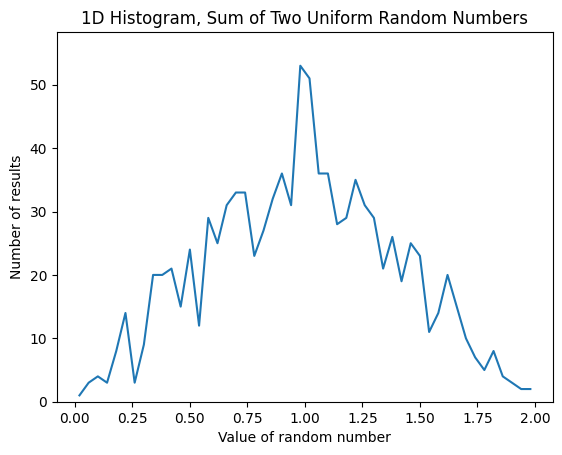

In [5]:
#use lin space to uniformly distribute edges from 0 to 2.0.
xbins = np.linspace(0,2.0,nbins+1)
yvals = np.zeros(nbins)
for lp in range(nbins):
  lodex = (x >= xbins[lp])
  hidex = (x < xbins[lp+1])
  yvals[lp] += np.sum(np.logical_and(lodex,hidex))

#xbins gives the edges of bins, but this is the centers
hxbin = xbins[0:nbins] + 0.5*2/nbins

#this will create the same lineplot
plt.plot(hxbin,yvals)
plt.title('1D Histogram, Sum of Two Uniform Random Numbers')
plt.xlabel('Value of random number')
plt.ylabel('Number of results')
plt.ylim(0,np.max(yvals)*1.1)
plt.show()


Method 4: even more manual method, loops through all bins and values.

In [6]:
yvals = np.zeros(nbins)
for lp in range(nbins):
  for lp2 in range(rnum):
    if (x[lp2] >= xbins[lp]) and (x[lp2] < xbins[lp+1]):
      yvals[lp] += 1
